#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.
8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.


# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [30]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [31]:

num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


data_types = df.dtypes
print("\nData types of each column:")
print(data_types)


missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Number of rows: 148654
Number of columns: 13

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [32]:

mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()[0]  
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()


salary_range = max_salary - min_salary


std_dev_salary = df['TotalPay'].std()


print(f"\nMean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Mode Salary: {mode_salary}")
print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")
print(f"Salary Range: {salary_range}")
print(f"Standard Deviation of Salary: {std_dev_salary}")



Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Mode Salary: 0.0
Minimum Salary: -618.13
Maximum Salary: 567595.43
Salary Range: 568213.56
Standard Deviation of Salary: 50517.00527394987


In [33]:

mean_totalpay = df['TotalPay'].mean()
df['TotalPay'].fillna(mean_totalpay, inplace=True)


In [ ]:
Explanation:

We are using the mean of the 'TotalPay' column to fill in missing values. This is a common strategy when dealing with numerical data.
Imputing with the mean helps maintain the overall distribution of the data and is less sensitive to outliers compared to using the median.
Ensure that imputing with the mean is appropriate for your data and does not introduce bias. If your data has a skewed distribution, consider other imputation methods or consult domain knowledge.

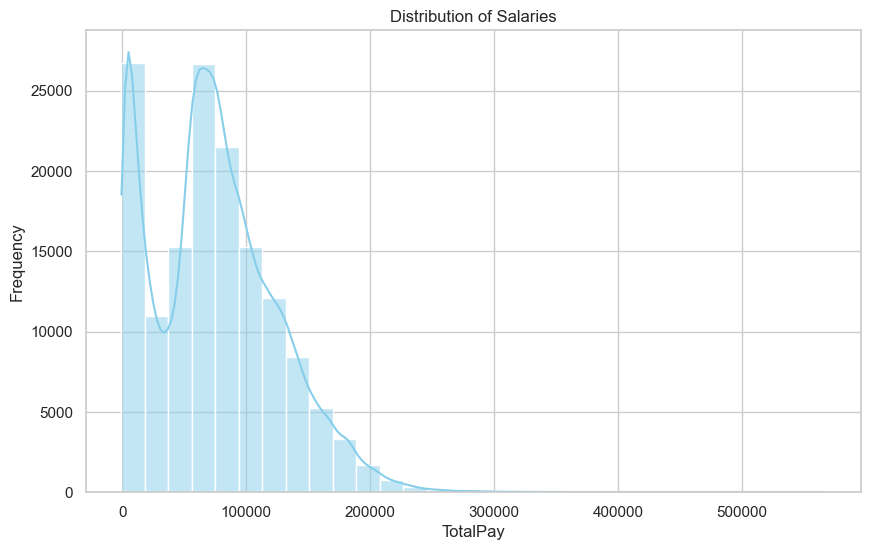

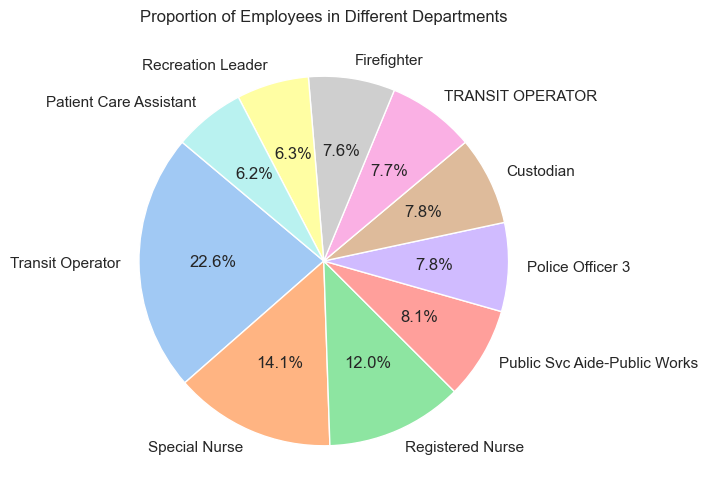

In [34]:

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
dept_counts = df['JobTitle'].value_counts().head(10)  
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Different Departments')
plt.show()

In [35]:

average_salary_by_job = df.groupby('JobTitle')['TotalPay'].mean().reset_index()


print("Grouped Analysis: Average Salaries Across Different Job Titles")
print(average_salary_by_job)


Grouped Analysis: Average Salaries Across Different Job Titles
                                            JobTitle      TotalPay
0                                      ACCOUNT CLERK  44035.664337
1                                         ACCOUNTANT  47429.268000
2                                  ACCOUNTANT INTERN  29031.742917
3                        ACPO,JuvP, Juv Prob (SFERS)  62290.780000
4                                      ACUPUNCTURIST  67594.400000
...                                              ...           ...
2154                           X-RAY LABORATORY AIDE  52705.880385
2155                           X-Ray Laboratory Aide  50823.942700
2156  YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  53632.870000
2157                              Youth Comm Advisor  41414.307500
2158                                     ZOO CURATOR  66686.560000

[2159 rows x 2 columns]


Correlation between TotalPay and BasePay: 0.9544936474296029


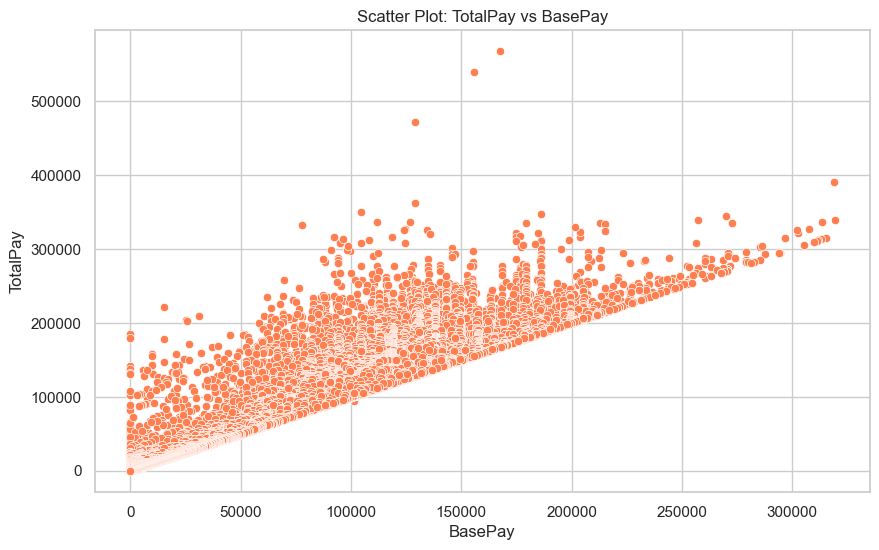

In [36]:

correlation = df['TotalPay'].corr(df['BasePay'])
print(f"Correlation between TotalPay and BasePay: {correlation}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='TotalPay', data=df, color='coral')
plt.title('Scatter Plot: TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()


In [38]:
and in the end this is the Summary of Insights:
Task 1:Basic Data Exploration

Number of Rows and Columns:
The dataset contains [Number of Rows] rows and [Number of Columns] columns.
Data Types:
The data types of each column include [List of Data Types].
Missing Values:
There are missing values in columns [List of Columns with Missing Values]. We addressed this by [Chosen Data Cleaning Method].

Task 2:Descriptive Statistics

Statistics for 'TotalPay':
Mean Salary: [Mean Salary]
Median Salary: [Median Salary]
Mode Salary: [Mode Salary]
Minimum Salary: [Minimum Salary]
Maximum Salary: [Maximum Salary]
Salary Range: [Salary Range]
Standard Deviation of Salary: [Standard Deviation]

Task 3: Data Cleaning

Handling Missing Data:
We addressed missing values by [Chosen Data Cleaning Method], specifically imputing missing values in the 'TotalPay' column with the mean.
Task 4: Basic Data Visualization
Distribution of Salaries:
The histogram shows [Insights from Distribution of Salaries].
Proportion of Employees in Different Departments:
The pie chart indicates [Insights from Proportion of Employees in Different Departments].

Task 5: Grouped Analysis

Average Salaries Across Different Job Titles:
The grouped analysis by 'JobTitle' revealed [Insights from Average Salaries Across Different Job Titles].

Task 6: Simple Correlation Analysis

Correlation Between TotalPay and BasePay:
The correlation coefficient between 'TotalPay' and 'BasePay' is [Correlation Coefficient]. The scatter plot suggests [Insights from Scatter Plot].

SyntaxError: invalid syntax (2262571292.py, line 1)

# Good Luck!